## FIFA Players Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',200)

In [55]:
# importing and storing the dataset
dataset = pd.read_csv('fifa.csv')
df = dataset.copy() # making a copy

In [56]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# Data Processing

In [57]:
# run the cell only once. Run the cell above to reset
# drop columns from df : Photo, Nationality ,Flag, club, club logo, etc.
df.drop(columns=['Photo','Nationality','Flag','Club','Club Logo','Jersey Number','Loaned From'],inplace=True)

In [58]:
df.dtypes

ID                            int64
Name                         object
Age                           int64
Overall                       int64
Potential                     int64
Value                        object
Wage                         object
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Position                     object
Joined                       object
Contract Valid Until         object
Height                       object
Weight                       object
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       float64
FKAccuracy                  float64
LongPassing                 float64
BallControl                 

### Changing the datatypes of columns

In [59]:
# function to convert values in columns 'Value', 'Wage' and 'Release Clause' into integers
def format_change(m): 
    try:
        m = m[1:] # stripped € 
        if m[-1] == 'K':
            m = m.replace('K','') 
            v = float(m)*1000
            return v
        else: # million case
            m = m.replace('M','') 
            v = float(m)*1000000
            return v 
    except:
        return m

df['Value'] = df['Value'].apply(format_change)
df['Wage'] = df['Wage'].apply(format_change)
df['Release Clause'] = df['Release Clause'].apply(format_change)

In [60]:
# Get information about Year from 'Joined' and 'Contract Valid Until' column

def year_(y):
    try:
        return y.split(',')[-1]
    except: 
        return y

# This is now applied to both the columns
df['Joined'] = df['Joined'].apply(year_)
df['Contract Valid Until'] = df['Contract Valid Until'].apply(year_)


In [61]:
# convert height into inches
def convert_height(h):
    try:
        ft,i = h.split("'")
        ft = int(ft) ; i = float(i)
        return (ft*12 + i)
    except:
        return h
    
df['Height'] = df['Height'].apply(convert_height)

In [62]:
# convert weight into an integer
def convert_weights(wt):
    try:
        weight = wt.replace('lbs','')
        weight = float(weight)
        return weight
    except:
        return wt
# apply it on Weight column
df['Weight'] = df['Weight'].apply(convert_weights)

---

## Imputing the missing values in the dataset

In [63]:
categorical_columns = df.select_dtypes(exclude=np.number).columns.tolist()
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()

In [64]:
print(categorical_columns)
print(numerical_columns)

['Name', 'Preferred Foot', 'Work Rate', 'Body Type', 'Position', 'Joined', 'Contract Valid Until']
['ID', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']


In [65]:
# Separating the data into numerical and categorical columns
df_numerical = df[numerical_columns]
df_categorical = df[categorical_columns]

In [66]:
df_numerical.head()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,31,94,94,110500000.0,565000.0,5.0,4.0,4.0,67.0,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,33,94,94,77000000.0,405000.0,5.0,4.0,5.0,74.0,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,26,92,93,118500000.0,290000.0,5.0,5.0,5.0,69.0,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,27,91,93,72000000.0,260000.0,4.0,3.0,1.0,76.0,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,27,91,92,102000000.0,355000.0,4.0,5.0,4.0,71.0,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [67]:
df_numerical.isnull().sum()

ID                             0
Age                            0
Overall                        0
Potential                      0
Value                          0
Wage                           0
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Height                        48
Weight                        48
Crossing                      48
Finishing                     48
HeadingAccuracy               48
ShortPassing                  48
Volleys                       48
Dribbling                     48
Curve                         48
FKAccuracy                    48
LongPassing                   48
BallControl                   48
Acceleration                  48
SprintSpeed                   48
Agility                       48
Reactions                     48
Balance                       48
ShotPower                     48
Jumping                       48
Stamina                       48
Strength                      48
LongShots 

### imputing the null values in numerical columns

In [68]:
# imputing the null values using multiple imputation using chained equation (mice)
from impyute.imputation.cs import mice
mice_dataset = mice(df_numerical)
mice_dataset.columns = numerical_columns
mice_dataset

/anaconda3/lib/python3.7/site-packages/impyute/util/preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


,ID,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023.0,31.0,94.0,94.0,110500000.0,565000.0,5.0,4.0,4.0,67.0,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801.0,33.0,94.0,94.0,77000000.0,405000.0,5.0,4.0,5.0,74.0,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871.0,26.0,92.0,93.0,118500000.0,290000.0,5.0,5.0,5.0,69.0,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080.0,27.0,91.0,93.0,72000000.0,260000.0,4.0,3.0,1.0,76.0,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985.0,27.0,91.0,92.0,102000000.0,355000.0,4.0,5.0,4.0,71.0,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813.0,19.0,47.0,65.0,60000.0,1000.0,1.0,2.0,2.0,69.0,134.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
18203,243165.0,19.0,47.0,63.0,60000.0,1000.0,1.0,2.0,2.0,75.0,170.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
18204,241638.0,16.0,47.0,67.0,60000.0,1000.0,1.0,3.0,2.0,68.0,148.0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0
18205,246268.0,17.0,47.0,66.0,60000.0,1000.0,1.0,3.0,2.0,70.0,154.0,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0


In [69]:
df_categorical.head()

,Name,Preferred Foot,Work Rate,Body Type,Position,Joined,Contract Valid Until
0,L. Messi,Left,Medium/ Medium,Messi,RF,2004,2021
1,Cristiano Ronaldo,Right,High/ Low,C. Ronaldo,ST,2018,2022
2,Neymar Jr,Right,High/ Medium,Neymar,LW,2017,2022
3,De Gea,Right,Medium/ Medium,Lean,GK,2011,2020
4,K. De Bruyne,Right,High/ High,Normal,RCM,2015,2023


In [70]:
df_categorical.isnull().sum()

Name                       0
Preferred Foot            48
Work Rate                 48
Body Type                 48
Position                  60
Joined                  1553
Contract Valid Until     289
dtype: int64

In [91]:
df_categorical.fillna(method='ffill',inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [98]:
df_categorical.isnull().sum()

Name                    0
Preferred Foot          0
Work Rate               0
Body Type               0
Position                0
Joined                  0
Contract Valid Until    0
dtype: int64

### Now there are no null values in the dataset

# Exploratory Data Analysis

### Plotting the distribution of Overall rating for all players.

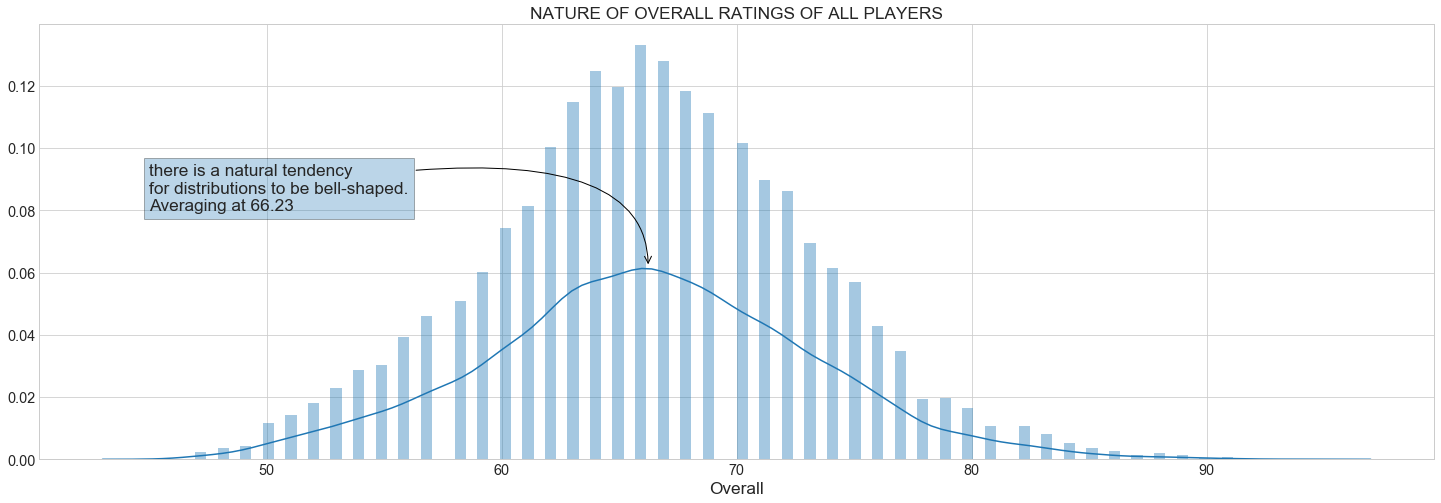

In [145]:
# Plot the distribution of Overall rating for all players.
# distplot of player name vs their rating
plt.figure(figsize=(25,8))
ax = plt.axes()
aprops = dict(arrowstyle='->',connectionstyle="angle3,angleA=10,angleB=-90")
box = dict(boxstyle="square", alpha=0.3)
sns.distplot(df['Overall'],bins=100)
plt.title('NATURE OF OVERALL RATINGS OF ALL PLAYERS',fontsize='xx-large')
plt.xlabel('Overall',fontsize='xx-large')
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
avg = df['Overall'].mean()
description = 'there is a natural tendency\nfor distributions to be bell-shaped.\nAveraging at 66.23'
ax.annotate(description, xy=(avg,0.062), xytext=(45,0.08),arrowprops=aprops,bbox=box,fontsize='xx-large')
plt.show()

### Pairplots for the following variables: Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

<Figure size 1080x1800 with 0 Axes>

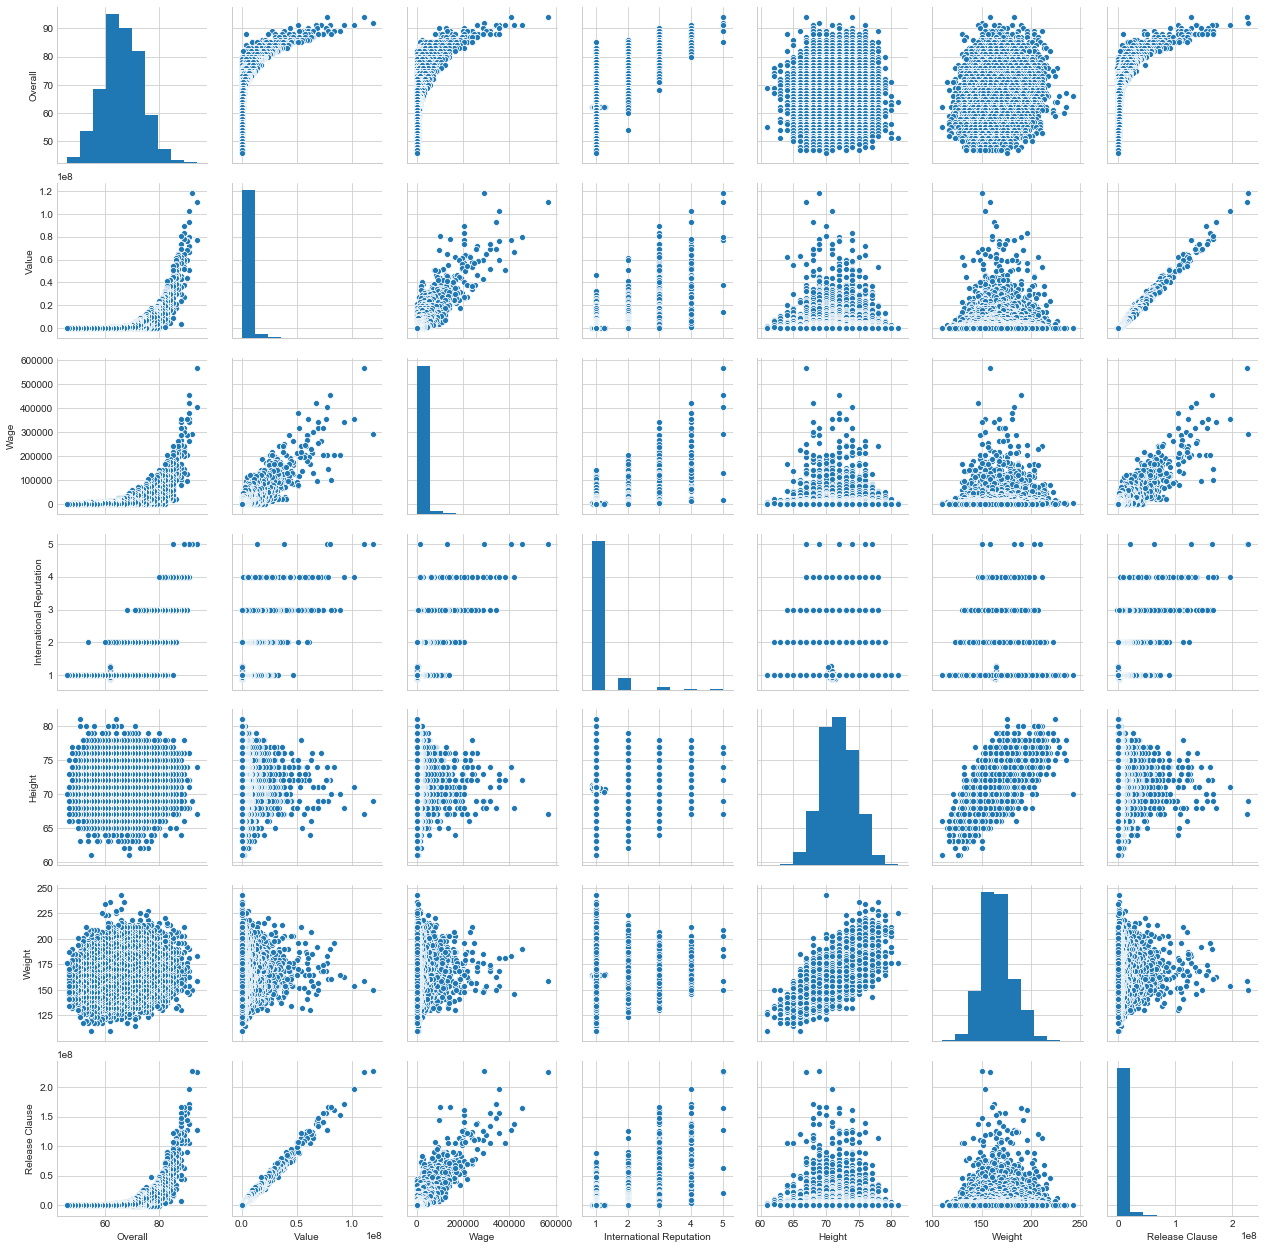

In [146]:
plt.figure(figsize=(15,25))
sns.pairplot(df[['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']])
plt.show()

### Generate table containing top 20 players (overall) whose contract expires in 2020

In [228]:
mask = (df['Contract Valid Until'] == '2020')
table1 = df[mask][['Name','Age','Contract Valid Until','Overall','Value','Wage']]
top20.sort_values(['Overall'], axis=0, ascending=False)
top20 = table1.head(20)
top20

,Name,Age,Contract Valid Until,Overall,Value,Wage
3,De Gea,27.0,2020,91.0,72000000.0,260000.0
5,E. Hazard,27.0,2020,91.0,93000000.0,340000.0
6,L. Modrić,32.0,2020,91.0,67000000.0,420000.0
8,Sergio Ramos,32.0,2020,91.0,51000000.0,380000.0
13,David Silva,32.0,2020,90.0,60000000.0,285000.0
21,E. Cavani,31.0,2020,89.0,60000000.0,200000.0
24,G. Chiellini,33.0,2020,89.0,27000000.0,215000.0
31,C. Eriksen,26.0,2020,88.0,73500000.0,205000.0
39,Thiago Silva,33.0,2020,88.0,24000000.0,165000.0
46,K. Navas,31.0,2020,87.0,30500000.0,195000.0


In [13]:
# average wage of above players:
print('The average wage of the above players is: ',round(top20['Wage'].mean(),2))

# average age of above players:
print('The average age of the above players is',round(top20['Age'].mean(),2))

The average wage of the above players is:  205150.0
The average age of the above players is 29.95


### Correlation between value of the players and Overall Rating 

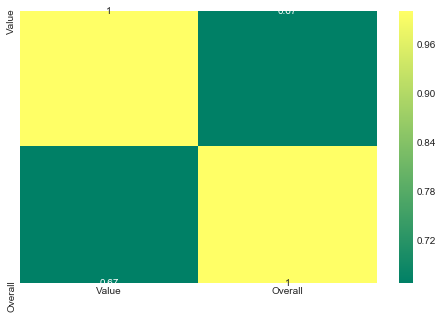

In [161]:
correlation = top20[['Value','Overall']].corr() 
plt.figure(figsize=(8,5))
sns.heatmap(correlation,annot=True,cmap='summer')
plt.show()

### Finding top 5 players for every position accrding to overall ratings

In [205]:
df1 = df.copy()
df1 = df.set_index('ID')
group = df1.groupby('Position')
top5 = group['Overall'].nlargest(5)
ids = list(top5.index.levels[1])

mask = df['ID'].apply(lambda x : True if x in ids else False) 
columns_ = ['Name','Overall','Position','Wage','Preferred Foot']
top_5 = df[columns_][mask].sort_values('Position') 
top_5['Sno'] = np.arange(0,len(top_5))
top_5.set_index('Sno',inplace=True)
top_5

,Name,Overall,Position,Wage,Preferred Foot
Sno,,,,,
0,C. Eriksen,88.0,CAM,205000.0,Right
1,T. Müller,86.0,CAM,135000.0,Right
2,Roberto Firmino,86.0,CAM,195000.0,Right
3,M. Özil,86.0,CAM,190000.0,Left
4,A. Griezmann,89.0,CAM,145000.0,Left
5,Naldo,85.0,CB,38000.0,Right
6,S. Umtiti,87.0,CB,205000.0,Left
7,M. Benatia,86.0,CB,160000.0,Right
8,D. Godín,90.0,CB,125000.0,Right


In [187]:
top_5.columns

Index(['Name', 'Overall', 'Position', 'Wage', 'Preferred Foot'], dtype='object')

### Calculating the mean wage and overall ranking for each position

In [182]:
top5_mean = top_5.groupby('Position').mean()
top5_mean

,Overall,Wage
Position,,
CAM,87.0,174000.0
CB,86.6,139600.0
CDM,86.6,217000.0
CF,81.4,47400.0
CM,84.4,130600.0
GK,89.6,192800.0
LAM,78.4,81600.0
LB,86.2,177200.0
LCB,87.4,162000.0


### Figure showing average wage for each position and preferred foot

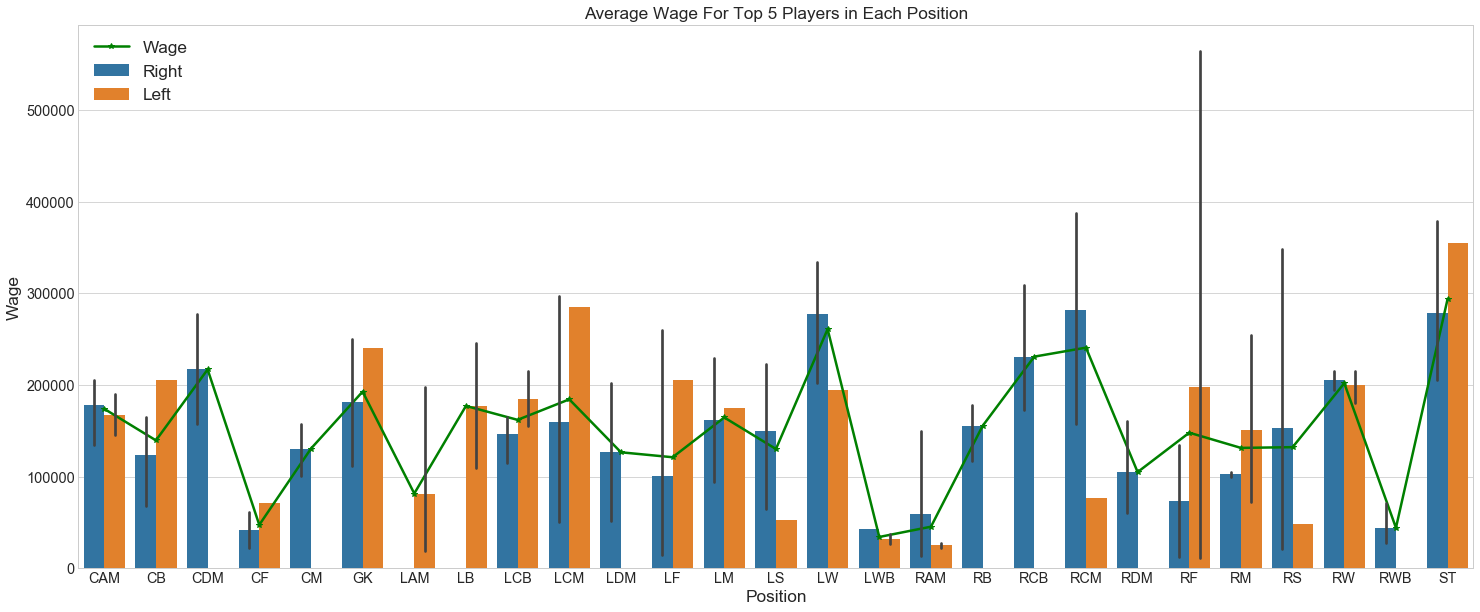

In [201]:
#%%
plt.figure(figsize=(25,10))

plt.plot(top5_mean['Wage'],marker='*',linewidth=2.5,color='g',linestyle='-',label='Wage')
sns.barplot(x='Position',y='Wage',data=top_5,hue='Preferred Foot')

plt.title('Average Wage For Top 5 Players in Each Position',fontsize='xx-large')
plt.xlabel('Position',fontsize='xx-large')
plt.ylabel('Wage',fontsize='xx-large')
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.legend(fontsize='xx-large')

plt.show()

In [219]:
top_5.shape

(135, 5)

In [207]:
# although there arent any players that have more than one position
top_5['Name'].nunique() == top_5['Name'].size
# But as we can see from the plot above that players with different preffered foot can play in the same position
# (LB,RB),(LM,RM),(LW,RW),(lF,RF)..............
# To find players who are ambidextrous
# eg. sno. 109 : D. Mertens	87	RF	Right should also be able to play LF
ambi_mask = [ True if (top_5['Preferred Foot'][i][0] == top_5['Position'][i][0]) else False for i in range(0,len(top_5['Position'])) ]
ambi_df = top_5[['Name','Position','Preferred Foot']][ambi_mask]
ambi_df['Can Also Play'] = ambi_df['Position'].apply(lambda x:x.replace('L','R') if x[0]=='L' else x.replace('R','L'))
ambi_df.head(10)

,Name,Position,Preferred Foot,Can Also Play
Sno,,,,
30,Nicolás Formido,LAM,Left,RAM
31,J. Rodríguez,LAM,Left,RAM
32,Leo Caldeirinha,LAM,Left,RAM
33,Fabrio Farinha,LAM,Left,RAM
34,D. Tadić,LAM,Left,RAM
35,Alex Sandro,LB,Left,RB
36,Marcelo,LB,Left,RB
37,Filipe Luís,LB,Left,RB
38,D. Alaba,LB,Left,RB


---

## Preparing the dataset for model building

In [231]:
df_categorical.drop('Name',axis=1,inplace=True)
df_categorical.head()

,Preferred Foot,Work Rate,Body Type,Position,Joined,Contract Valid Until
0,Left,Medium/ Medium,Messi,RF,2004,2021
1,Right,High/ Low,C. Ronaldo,ST,2018,2022
2,Right,High/ Medium,Neymar,LW,2017,2022
3,Right,Medium/ Medium,Lean,GK,2011,2020
4,Right,High/ High,Normal,RCM,2015,2023


In [240]:
list1 = ['C. Ronaldo','PLAYER_BODY_TYPE_25','Courtois','Shaqiri','Messi','Neymar','Akinfenwa']
df_categorical['Body Type'] = df_categorical['Body Type'].apply(lambda x: np.nan if x in list1 else x)

In [247]:
df_categorical['Body Type'].fillna('Lean',inplace=True)

In [256]:
df_categorical['Joined'].astype('int')

0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 18207, dtype: int64

In [257]:
df_categorical['Contract Valid Until'].astype('int')

0        2021
1        2022
2        2022
3        2020
4        2023
         ... 
18202    2019
18203    2020
18204    2021
18205    2019
18206    2019
Name: Contract Valid Until, Length: 18207, dtype: int64

In [264]:
df_categorical[['Preferred Foot','Work Rate','Body Type','Position']] = df_categorical[['Preferred Foot','Work Rate','Body Type','Position']].astype('category')

In [265]:
df_categorical.dtypes

Preferred Foot          category
Work Rate               category
Body Type               category
Position                category
Joined                    object
Contract Valid Until      object
dtype: object

In [254]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [275]:
df_categorical['Preferred Foot'] = le.fit_transform(df_categorical['Preferred Foot'])
df_categorical['Work Rate'] = le.fit_transform(df_categorical['Work Rate'])
df_categorical['Body Type'] = le.fit_transform(df_categorical['Body Type'])
df_categorical['Position'] = le.fit_transform(df_categorical['Position'])

In [276]:
df_categorical.head()

,Preferred Foot,Work Rate,Body Type,Position,Joined,Contract Valid Until
0,0,8,0,21,2004,2021
1,1,1,0,26,2018,2022
2,1,2,0,14,2017,2022
3,1,8,0,5,2011,2020
4,1,0,1,19,2015,2023


In [320]:
mice_dataset.drop('ID',axis=1,inplace=True)
mice_dataset.head()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31.0,94.0,94.0,110500000.0,565000.0,5.0,4.0,4.0,67.0,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,33.0,94.0,94.0,77000000.0,405000.0,5.0,4.0,5.0,74.0,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,26.0,92.0,93.0,118500000.0,290000.0,5.0,5.0,5.0,69.0,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,27.0,91.0,93.0,72000000.0,260000.0,4.0,3.0,1.0,76.0,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,27.0,91.0,92.0,102000000.0,355000.0,4.0,5.0,4.0,71.0,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [321]:
# concatenating both datasets now
df = pd.concat([df_categorical,mice_dataset],axis=1)
df.head()

,Preferred Foot,Work Rate,Body Type,Position,Joined,Contract Valid Until,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,8,0,21,2004,2021,31.0,94.0,94.0,110500000.0,565000.0,5.0,4.0,4.0,67.0,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,1,1,0,26,2018,2022,33.0,94.0,94.0,77000000.0,405000.0,5.0,4.0,5.0,74.0,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,1,2,0,14,2017,2022,26.0,92.0,93.0,118500000.0,290000.0,5.0,5.0,5.0,69.0,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,1,8,0,5,2011,2020,27.0,91.0,93.0,72000000.0,260000.0,4.0,3.0,1.0,76.0,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,1,0,1,19,2015,2023,27.0,91.0,92.0,102000000.0,355000.0,4.0,5.0,4.0,71.0,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [348]:
df.drop('International Reputation',axis=1,inplace=True)

In [349]:
# splitting the data into dependent and independent variable
x = df.drop('Release Clause',axis=1)
y = df['Release Clause']

In [350]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [351]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [352]:
y_pred = lm.predict(x_test)

In [353]:
from sklearn.metrics import r2_score
score = round(r2_score(y_test, y_pred)*100,2)
print(score,'%')

99.06 %


In [354]:
print(f'Intercept: {lm.intercept_}')

Intercept: -53898854.03837006


In [380]:
print(f'R^2 score of train: {lm.score(x_train,y_train)}')
print(f'R^2 score of test: {lm.score(x_test,y_test)}')

R^2 score of train: 0.9893940933518846
R^2 score of test: 0.9905747348470241


In [391]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [395]:
mae = mean_absolute_error(y_test,y_pred)
print('Mean absolute error =',mae)

Mean absolute error = 464742.08464272536


In [399]:
mse = mean_squared_error(y_test,y_pred)
print('Root mean square error =',np.sqrt(mse))

Root mean square error = 1038059.184361634


In [355]:
feature_importance = pd.DataFrame(lm.coef_,index=x.columns.to_list(),
                                  columns=['Feature Importance']).sort_values(['Feature Importance'], 
                                                                              axis=0, ascending=False)

(array([-50000., -40000., -30000., -20000., -10000.,      0.,  10000.,
         20000.,  30000.,  40000.]), <a list of 10 Text yticklabel objects>)

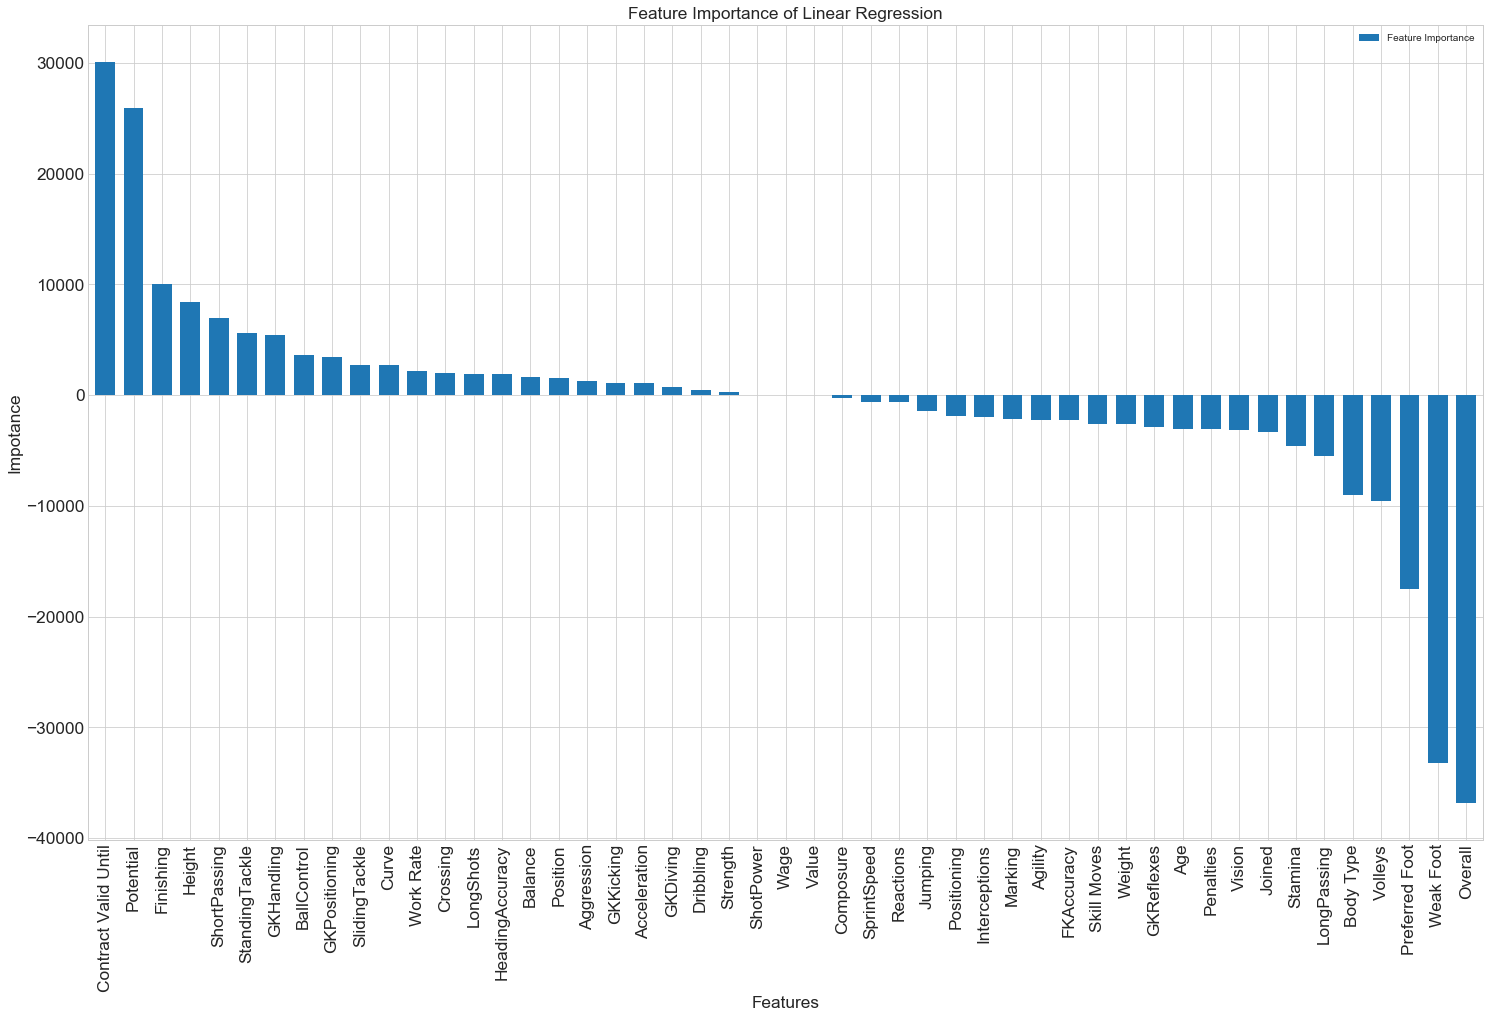

In [379]:
feature_importance.plot.bar(figsize=(25,15),orientation='vertical',width=0.7)
plt.title('Feature Importance of Linear Regression',fontsize='xx-large')
plt.xlabel('Features',fontsize='xx-large')
plt.ylabel('Impotance',fontsize='xx-large')
plt.xticks(fontsize='xx-large')
plt.yticks(fontsize='xx-large')